ERROR: ignored

In [0]:
set.seed(123)
data<-read.csv("../input/heart.csv")
head(data)
str(data)
dim(data)


In [0]:
names(data)

In [0]:
sum(is.na(data))

SEX VS CHOLESTROL

In [0]:
ggplot(data,aes(x=data$sex),y=data$chol)+geom_bar()+theme(legend.position = "none")



In [0]:
AGE VS CHOLESTROL

In [0]:
ggplot(data,aes(x=data$age),y=data$chol)+geom_bar()+theme(legend.position = "none")

In [0]:
ggplot(data,aes(x=data$age),y=data$thalach)+geom_bar()+xlab("Age")+ylab("Maximum heart rate")

Age Vs Maximum Heart Rate by Gender

In [0]:
ggplot(data,aes(x=data$age),y=data$thalach)+geom_bar()+xlab("Age")+ylab("Maximum heart rate")+facet_grid(data$sex)

Age Vs Maximun heart rate by Gender

In [0]:
ggplot(data,aes(x=data$age),y=data$chol)+geom_bar()+xlab("Age")+ylab("Maximum heart rate")+facet_grid(data$sex)

Sex Vs ChestPain

In [0]:
ggplot(data,aes(x=data$sex),y=data$thalach)+geom_bar()+xlab("Age")+ylab("Maximum heart rate")+facet_grid(data$sex)

Age Vs ChestPain by Gender

In [0]:
ggplot(data,aes(x=data$age),y=data$cp)+geom_bar()+xlab("Age")+ylab("Maximum heart rate")+facet_grid(data$sex)

Fasting Blood Sugar VS Age

In [0]:
ggplot(data,aes(x=data$fbs),y=data$thalach)+geom_bar()+xlab("Age")+ylab("Maximum heart rate")+facet_grid(data$sex)

In [0]:
#splitting into training and testing set

#split
library(caTools)
set.seed(234)
split<- sample.split(data,SplitRatio = 0.8)
split
#training set
train_set<- subset(data, split == T)
train_set
#testing set
test_set<- subset(data, split == F)
test_set
dim(train_set)
dim(test_set)

In [0]:
#random forest
library(randomForest)
set.seed(1234)
random=randomForest(target~.,
                       train_set,
                       ntree=500)
random 
pred=predict(random,test_set)
pred=ifelse(pred>0.5,1,0)

cm<-table(test_set$target,pred)
cm
accuracy_rf<-sum(diag(cm))/sum(cm)*100
accuracy_rf  


In [0]:
#Decision Tree
set.seed(789)
decision<-rpart(formula = target ~.,   data=train_set,method="class")
decision
# Predicting the Test set results
pred = predict(decision,test_set, type = 'class')
#confusion matrix
table_mat<-table(test_set$target,pred)
table_mat
accuracy_dt<-sum(diag(table_mat)/sum(table_mat))*100
accuracy_dt

In [0]:
rpart.plot(decision)

In [0]:
#logistic model
set.seed(124)
model<- glm(target~.,train_set,family="binomial")
# Predicting the Test set results
pred = predict(model,test_set, type = 'response')
pred = ifelse(pred>0.5,1,0)
pred
#confusion matrix
table_mat<-table(test_set$target,pred)
table_mat
accuracy_lg<-sum(diag(table_mat)/sum(table_mat))*100
accuracy_lg

In [0]:
#svm
set.seed(567)

fit = svm(formula = target ~ ., 
                data = train_set,kernel = 'linear')     
fit

prediction = predict(fit, newdata = test_set)
prediction = ifelse(prediction>0.5,1,0)


confusion_matrix = table(test_set$target, prediction)
confusion_matrix

accuracy_svm <- sum(diag(confusion_matrix))/sum(confusion_matrix) *100
accuracy_svm 

In [0]:

#XG BOOST
library(xgboost)
set.seed(4)
train_mat<-as.matrix(train_set[,-14])
test_mat<-as.matrix(test_set[,-14])
model<-xgboost(data = train_mat,train_set$target,nrounds = 10)
model
y_pred<-predict(model,test_mat)
y_pred
y_pred<-ifelse(y_pred>0.5,1,0)
y_pred
cm<-table(y_pred,test_set$target)
cm
accuracy_xg<-sum(diag(cm))/sum(cm)*100
accuracy_xg      

[1]	train-rmse:0.374681 
[2]	train-rmse:0.281785 
[3]	train-rmse:0.216445 
[4]	train-rmse:0.168246 
[5]	train-rmse:0.134819 
[6]	train-rmse:0.110793 
[7]	train-rmse:0.095719 
[8]	train-rmse:0.080761 
[9]	train-rmse:0.068234 
[10]	train-rmse:0.059586 


##### xgb.Booster
raw: 25 Kb 
call:
  xgb.train(params = params, data = dtrain, nrounds = nrounds, 
    watchlist = watchlist, verbose = verbose, print_every_n = print_every_n, 
    early_stopping_rounds = early_stopping_rounds, maximize = maximize, 
    save_period = save_period, save_name = save_name, xgb_model = xgb_model, 
    callbacks = callbacks)
params (as set within xgb.train):
  silent = "1"
xgb.attributes:
  niter
callbacks:
  cb.print.evaluation(period = print_every_n)
  cb.evaluation.log()
# of features: 13 
niter: 10
nfeatures : 13 
evaluation_log:
    iter train_rmse
       1   0.374681
       2   0.281785
---                
       9   0.068234
      10   0.059586

[1] 0.593814909 0.431826293 1.050322294 1.005436182 0.094332725 0.982305408
 [7] 0.715275884 0.768426716 0.884738803 0.710543215 0.953040481 0.975018144
[13] 0.982305408 0.995168805 0.928690612 0.832697511 0.340573788 0.995168805
[19] 0.672041118 0.733207703 1.000101089 0.950194955 0.995168805 0.488950908
[25] 0.062577724 0.978073835 0.063106358 0.979769230 0.850691259 0.948454976
[31] 0.979566932 1.008815527 0.995168805 0.716235280 0.762343049 0.995168805
[37] 0.062109530 0.021847576 0.074201196 0.138706177 0.983825326 0.016624212
[43] 0.414202869 0.025022596 0.008576095 0.012030751 0.548509896 0.024053395
[49] 0.270596027 0.978073835 0.013390660 0.110376805 0.019426823 0.011964262
[55] 0.267232656 0.997093678 0.374456793 0.944361329 0.936486840 0.014039695
[61] 0.982305408 0.651262224 0.014322579 0.008576095 0.314075410 0.501267731

[1] 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0
[39] 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1

      
y_pred  0  1
     0 21  6
     1  9 30

[1] 77.27273

[1] 78.78788 81.81818 80.30303 87.87879 77.27273

[1] "DESCISION TREE"            "LOGISTIC REGRESSION"      
[3] "RANDOM FOREST"             "SUPPORT VECTOR MACHINE"   
[5] "extreme Gradient boosting"

Algorithm,Accuracy
DESCISION TREE,78.78788
LOGISTIC REGRESSION,81.81818
RANDOM FOREST,80.30303
SUPPORT VECTOR MACHINE,87.87879
extreme Gradient boosting,77.27273


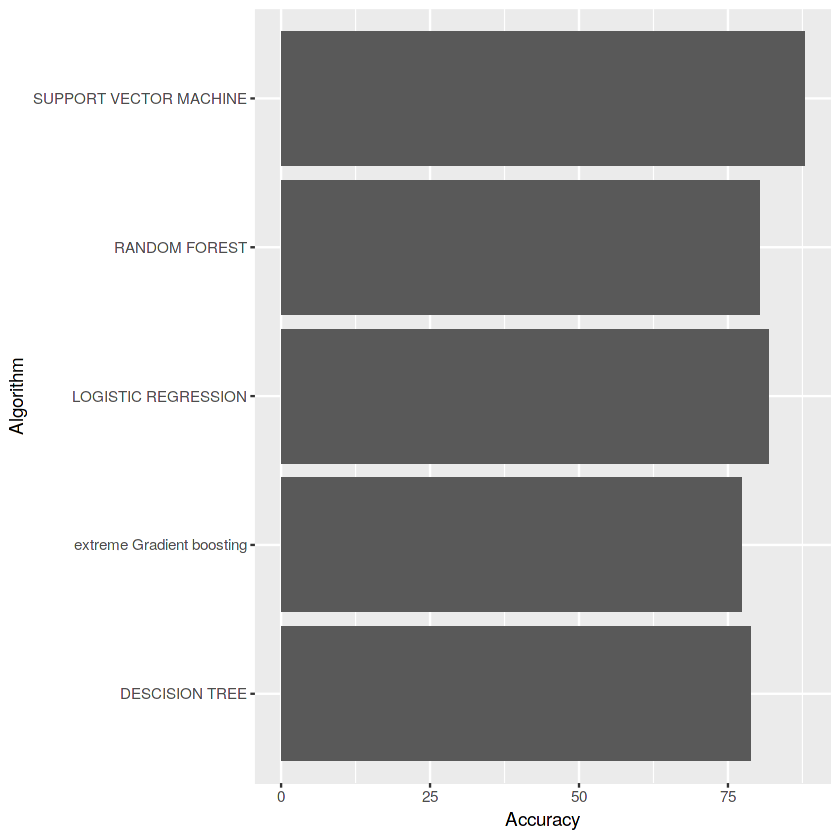

In [0]:
#Comparing the algorithms

Accuracy<-c(accuracy_dt,accuracy_lg,accuracy_rf,accuracy_svm,accuracy_xg)
Accuracy
Algorithm<-c("DESCISION TREE","LOGISTIC REGRESSION","RANDOM FOREST","SUPPORT VECTOR MACHINE","extreme Gradient boosting")
Algorithm
library(data.table)
result<-data.table(Algorithm,Accuracy)
result
library(ggplot2)
ggplot(result,aes(x=Algorithm,y=Accuracy))+geom_col()+coord_flip()